In [1]:
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
sys.path.append("/Users/santy/Google Drive/github projects/questaal-reader")
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp

In [9]:
import sys
sys.path.append("/Users/santy/Google Drive/github projects/questaal-reader")
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
# from adjustText import adjust_text
import re
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from tabulate import tabulate
from scipy.interpolate import Rbf
from pysciplottk.easyplotter import EasyPlotter
from scipy.ndimage import gaussian_filter1d

In [10]:
p_bse=get_bands("../data/bnds_BSE_better.temp",coords_are_cartesian=False)
p_gw=get_bands("../data/bnds_QSGW.temp",coords_are_cartesian=False)

---------- BSE ----------
Indirect {'energy': 0.0, 'direct': False, 'transition': None}

 ---------- QSGW ----------
Indirect {'energy': 0.0, 'direct': False, 'transition': None}


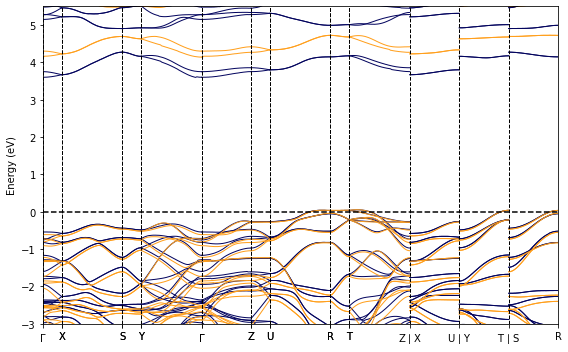

In [5]:
fig,ax=plt.subplots(figsize=(8,5))
colors = ["#e71d36","#ff9f1c","#03045e"]
bp_plot=bp(p_bse).bs_plot_data()
bp_plot_gw=bp(p_gw).bs_plot_data()
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy']['1'][i]
    e_gw=bp_plot_gw['energy']['1'][i]
    for k,kgw in zip(e,e_gw):
        # if k[0]>0:ls="-"
        # else:ls="-"
        ls="-"
        ax.plot(d,k,c=colors[2],lw=1,ls=ls,alpha=1)     
        ax.plot(d,kgw,c=colors[1],lw=1,ls=ls,alpha=1)   

for j,i in enumerate(bp_plot['ticks']["distance"]):
        ax.axvline(i,c="k",ls="--",lw=1)
ax.axhline(0,c="k",ls="--")
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=10)
ax.set_ylim(-3,5.5)
ax.set_ylabel("Energy (eV)")
ax.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()
# plt.savefig("../figures/bands_BSE_GW_compare.pdf",dpi=300)
plt.show()